In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(get_size("/content/drive/MyDrive/10K/10K 2018/sec-edgar-filings"), 'bytes')

In [ ]:
print(get_size("/content/drive/MyDrive/10K/10K 2017/sec-edgar-filings"), 'bytes')

22654819762 bytes


In [ ]:
print(get_size("/content/drive/MyDrive/10K/10K 2016/sec-edgar-filings"), 'bytes')

22218325837 bytes


In [ ]:
24625511198 + 22654819762 + 22218325837 

69498656797

In [ ]:
# ------------------------------------------------------------------------

In [ ]:
!pip install bert-extractive-summarizer

     |████████████████████████████████| 7.6 MB 53.3 MB/s 


In [ ]:
from summarizer import Summarizer
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = Summarizer()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
textjoined = """ 
If we do not adequately predict customer demand or otherwise optimize and operate our fulfillment network and data centers successfully, it could result in excess or insufficient fulfillment or data center capacity, or result in increased costs, impairment charges, or both, or harm our business in other ways. As we continue to add fulfillment and data center capability or add new businesses with different requirements, our fulfillment and data center networks become increasingly complex and operating them becomes more challenging. There can be no assurance that we will be able to operate our networks effectively.
In addition, a failure to optimize inventory in our fulfillment network will increase our net shipping cost by requiring long-zone or partial shipments. Orders from several of our websites are fulfilled primarily from a single location, and we have only a limited ability to reroute orders to third parties for drop-shipping. We and our co-sourcers may be unable to adequately staff our fulfillment network and customer service centers. If the other businesses on whose behalf we perform inventory fulfillment services deliver product to our fulfillment centers in excess of forecasts, we may be unable to secure sufficient storage space and may be unable to optimize our fulfillment network.
We rely on a limited number of shipping companies to deliver inventory to us and completed orders to our customers.
If we are not able to negotiate acceptable terms with these companies or they experience performance problems or other difficulties, it could negatively impact our operating results and customer experience. In addition, our ability to receive inbound inventory efficiently and ship completed orders to customers also may be negatively affected by inclement weather, fire, flood, power loss, earthquakes, labor disputes, acts of war or terrorism, acts of God, and similar factors.
Third parties either drop-ship or otherwise fulfill an increasing portion of our customers’ orders, and we are increasingly reliant on the reliability, quality, and future procurement of their services. Under some of our commercial agreements, we maintain the inventory of other companies, thereby increasing the complexity of tracking inventory and operating our fulfillment network. Our failure to properly handle such inventory or the inability of these other companies to accurately forecast product demand would result in unexpected costs and other harm to our business and reputation.
"""

In [ ]:
result = model(textjoined,max_length=500)
summary = "".join(result)
summary

'If we do not adequately predict customer demand or otherwise optimize and operate our fulfillment network and data centers successfully, it could result in excess or insufficient fulfillment or data center capacity, or result in increased costs, impairment charges, or both, or harm our business in other ways. If the other businesses on whose behalf we perform inventory fulfillment services deliver product to our fulfillment centers in excess of forecasts, we may be unable to secure sufficient storage space and may be unable to optimize our fulfillment network. We rely on a limited number of shipping companies to deliver inventory to us and completed orders to our customers.'

In [ ]:
textjoined = """ 
We direct customers to our websites primarily through a number of targeted online marketing channels, such as our Associates program, sponsored search, portal advertising, email marketing campaigns, direct sales, and other initiatives. Our marketing expenses are largely variable, based on growth in sales and changes in rates. To the extent there is increased or decreased competition for these traffic sources, or to the extent our mix of these channels shifts, we would expect to see a corresponding change in our marketing expense.
The increase in marketing costs in absolute dollars in 2015, 2014, and 2013, compared to the comparable prior year periods, is primarily due to increased spending on online marketing channels, as well as payroll and related expenses.
While costs associated with Amazon Prime memberships and other shipping offers are not included in marketing expense, we view these offers as effective worldwide marketing tools, and intend to continue offering them indefinitely.
"""

In [ ]:
result = model(textjoined,max_length=500)
summary = "".join(result)
summary

'We direct customers to our websites primarily through a number of targeted online marketing channels, such as our Associates program, sponsored search, portal advertising, email marketing campaigns, direct sales, and other initiatives. The increase in marketing costs in absolute dollars in 2015, 2014, and 2013, compared to the comparable prior year periods, is primarily due to increased spending on online marketing channels, as well as payroll and related expenses.'

In [ ]:
text1 = "We direct customers to our websites primarily through a number of targeted online marketing channels, such as our Associates program, sponsored search, portal advertising, email marketing campaigns, direct sales, and other initiatives. Our marketing expenses are largely variable, based on growth in sales and changes in rates. To the extent there is increased or decreased competition for these traffic sources, or to the extent our mix of these channels shifts, we would expect to see a corresponding change in our marketing expense."

In [ ]:
inputs = tokenizer(text1, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]
outputs

tensor([[ 3.2738, -1.6370, -2.8420]], grad_fn=<AddmmBackward0>)

In [ ]:
# -----------------------------------------------------------------------------------------------------------------------

In [ ]:
def checkParent(tag):
  while True: 
    try:
      up = tag.parent
      if up.name == "tr":
        return up 
      else:
        tag = up
    except AttributeError:
      return False

In [ ]:
import re
from bs4 import BeautifulSoup
def getInternalUrl(filePath):
  internalDict = {}
  pattern = re.compile("^#")
  soup = BeautifulSoup(open(filePath), 'html.parser')
  for a in soup.find_all('a', href=pattern):
    # print(a)
    if re.match(r'^([\s\d]+)$', a.text):
      continue

    up = checkParent(a)
    # print("item" in up.text.lower())
    if up != False:
      if a['href'] not in internalDict.keys() and "item" in up.text.lower():
        internalDict[a['href']] = up.text
        # print("Found the URL: " +  a['href'] + " " + up.text)
  return soup, internalDict

In [ ]:
def getItemDict(internalDict):  
  nameItem = ["Business","Risk Factors","Legal Proceedings","Management’s Discussion ", "Quantitative and Qualitative","Financial Statements and Supp"]
  ItemDict = {}
  for key,value in internalDict.items():
    for el in nameItem:
      if el.lower() in value.lower():
        ItemDict[key] = value
      
  ItemID = ["item1","item1a","item3","item7","item7a","item8"]
  if len(ItemDict.keys()) != 6:
    ItemDict = {}
    for key,value in internalDict.items() :
      for el in ItemID:
        if el in value.replace(" ","").lower() and re.search("{}\.".format(el),value.replace(" ","").lower()):
          ItemDict[key] = value
  return ItemDict

In [ ]:
def GetItemIndex(ItemDict,internalDict):
  ItemList = list(ItemDict.keys())
  internalList = list(internalDict.keys())
  ItemListIndex = []
  for el in ItemList:
    ItemListIndex.append(internalList.index(el))
  return internalList, ItemListIndex

In [ ]:
def getBelow(start):
  textList = []
  div_start = start
  while True:

    while True:
      if start == None:
        break
      textList.append(start)
      next = start.nextSibling
      start = next

    if len(textList) < 5:
      textList = []
      start = div_start.parent
      div_start = start
    else:
      return textList


  return textList

In [ ]:
def SummerizeAndAnalyze(textjoined):
  result = model(textjoined, min_length=20,max_length=200)
  summary = "".join(result)
  try:
    result = model(textjoined, min_length=20,max_length=200)
    summary = "".join(result)
    inputs = tokenizer(summary, return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]
  except RuntimeError:
    result = model(textjoined, min_length=20,max_length=90)
    summary = "".join(result)
    inputs = tokenizer(summary, return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]
  return summary,outputs

In [ ]:
import json
import numpy as np

def Process10K(filePath,ticker):
  soup, internalDict = getInternalUrl(filePath)
  
  ItemDict = getItemDict(internalDict)
  if len(ItemDict) != 6 : return "!=6"



  internalList, ItemListIndex = GetItemIndex(ItemDict,internalDict)
  saveDict = {}
  SentimentDict = {}
  for startIndex in ItemListIndex:

    try:
      StartUrl = internalList[startIndex].replace("#","")
      EndUrl = internalList[startIndex+1].replace("#","")
    except:
      return "StartUrl"

    if soup.find("div",{"id":StartUrl}) != None:
      start = soup.find("div",{"id":StartUrl})
      end = soup.find("div",{"id":EndUrl})
    else:
      start = soup.find("a",{"name":StartUrl})
      end = soup.find("a",{"name":EndUrl})
    
    if start == None : return "start == None"
    if end == None : return "end == None"
    
    textList = []
    for item in getBelow(start):
      if item not in getBelow(end):
        try:
          textList.append(item.text)
        except:
          pass
    
    textList = [item for item in textList if len(item) > 50]

    chunks = np.array_split(textList, 4)
    textjoined = ' '.join(textList)

    
    
    # SentimentArray = []
    
    for chunk in chunks:
      textjoined = ' '.join(chunk)
      # SentimentArray.append(SummerizeAndAnalyze(textjoined).tolist()[0])
      summary,outputs = SummerizeAndAnalyze(textjoined)
      # print(np.argmax(outputs.detach().numpy()))

      SentimentDict[summary] = int(np.argmax(outputs.detach().numpy()))

  return SentimentDict
    # itemName = ItemDict[internalList[startIndex]]
    # saveDict[itemName] = SentimentArray



  # return "success"

In [ ]:
import os
sentiment =  os.listdir("/content/drive/MyDrive/10K/Sentiment")

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
def removeStopWord(example_sent):
  stop_words = set(stopwords.words('english'))
  
  word_tokens = word_tokenize(example_sent)
  # converts the words in word_tokens to lower case and then checks whether
  #they are present in stop_words or not
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  #with no lower case conversion
  # filtered_sentence = []
  
  # for w in word_tokens:
  #     if w not in stop_words:
  #         filtered_sentence.append(w)
  # filtered_sentence
  return filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


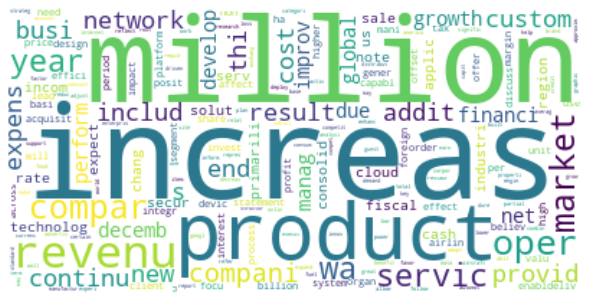

In [ ]:
import json
count ={0:0,1:0,2:0}
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

wc = WordCloud(background_color='white')
counts_all = Counter()

for el in sentiment:
  f = open("/content/drive/MyDrive/10K/Sentiment/" + el)
  data = json.load(f)
  for text,cat in data.items():
    count[cat] +=1
    if cat == 1:
      textList = word_tokenize(text)
      textList = [ps.stem(el) for el in textList]
      counts_line = wc.process_text(" ".join(textList))
      counts_all.update(counts_line)

import matplotlib.pyplot as plt
wc.generate_from_frequencies(counts_all)
plt.figure(figsize = (8, 8))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [ ]:
ps.stem("increased")

'increas'

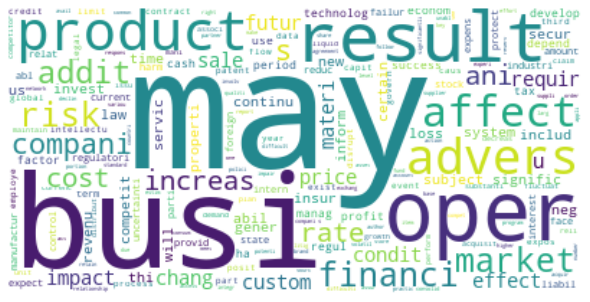

In [ ]:
import json
count ={0:0,1:0,2:0}
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

wc = WordCloud(background_color='white')
counts_all = Counter()

for el in sentiment:
  f = open("/content/drive/MyDrive/10K/Sentiment/" + el)
  data = json.load(f)
  for text,cat in data.items():
    count[cat] +=1
    if cat == 2:
      textList = word_tokenize(text)
      textList = [ps.stem(el) for el in textList]
      counts_line = wc.process_text(" ".join(textList))
      counts_all.update(counts_line)

import matplotlib.pyplot as plt
wc.generate_from_frequencies(counts_all)
plt.figure(figsize = (8, 8))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


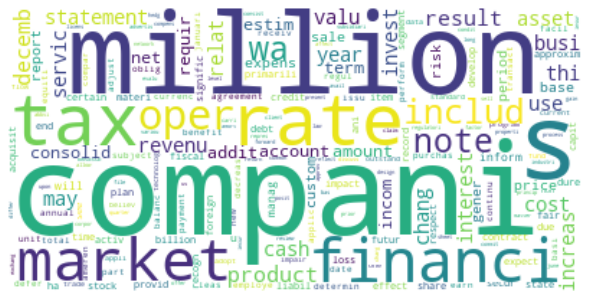

In [ ]:
import json
count ={0:0,1:0,2:0}
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

wc = WordCloud(background_color='white')
counts_all = Counter()

for el in sentiment:
  f = open("/content/drive/MyDrive/10K/Sentiment/" + el)
  data = json.load(f)
  for text,cat in data.items():
    count[cat] +=1
    if cat == 0:
      textList = word_tokenize(text)
      textList = [ps.stem(el) for el in textList]
      counts_line = wc.process_text(" ".join(textList))
      counts_all.update(counts_line)

import matplotlib.pyplot as plt
wc.generate_from_frequencies(counts_all)
plt.figure(figsize = (8, 8))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [ ]:
# Neutral, Positive, Negative

In [ ]:
count

{0: 537, 1: 80, 2: 153}